In [1]:
###TIME SERIES ANALYSIS FOR TATA MOTORS COMPANY FOR THE YEAR 2017-2022
###IMPORTING LIBRARIES

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
#READ CSV FILE

df = pd.read_csv("TATAMOTORS.NS.csv", parse_dates = ['Date'], index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-09,499.399994,504.600006,492.149994,500.149994,500.149994,3932710
2017-01-10,506.549988,518.000000,505.950012,516.250000,516.250000,7973024
2017-01-11,520.250000,523.950012,517.150024,519.250000,519.250000,4886398
2017-01-12,521.700012,524.000000,513.200012,518.250000,518.250000,4219627
2017-01-13,523.250000,523.250000,507.500000,514.849976,514.849976,6367248


<AxesSubplot:xlabel='Date'>

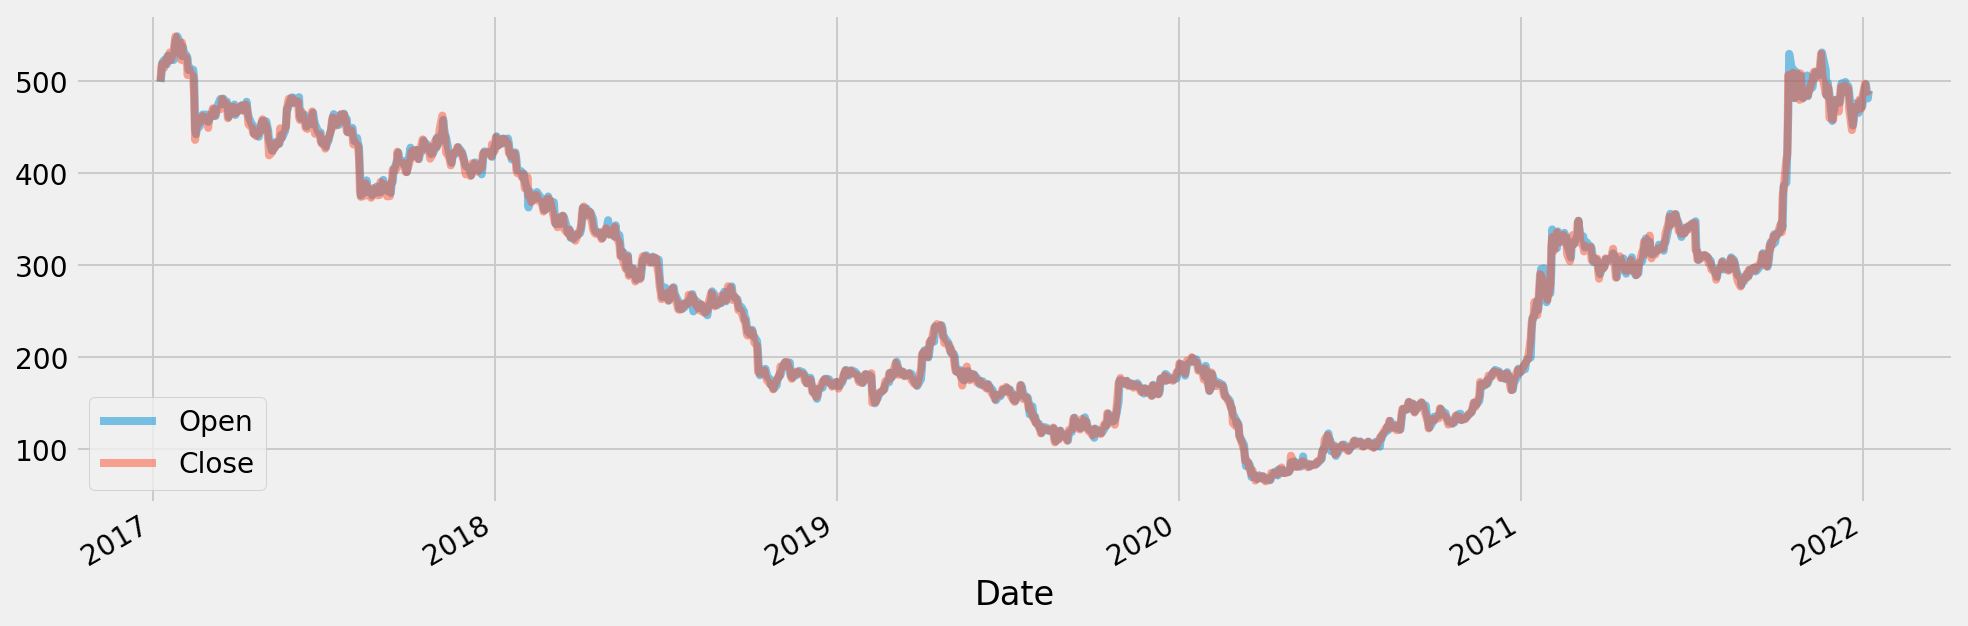

In [22]:
#There are six columns given:

#High -> Highest Price of the stock for that particular date.

#Low -> Lowest Price of the stock for that particular date.

#Open -> Opening Price of the stock.

#Close -> Closing Price of the stock.

#Volume -> Total amount of Trading Activity.

#AdjClose -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

df[['Open', 'Close']].plot(figsize = (15, 5), alpha = 0.5)

**Observation Points:

*We can observe that there are no huge variations in the opening-closing price and the high-low prices.

*There was a huge dip in the stock prices in March 2020 (owing to Covid Pandemic).

*Post first wave there was an overall increase in the stock price.

*The stock prices started to increase from the latter half for the year 2020 and increased gradually despite second wave abruptions.

*The stock price went drastically down from starting of 2017 to 2019.

**Decomposition:

- A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

- These components are defined as follows:

- Level: The average value in the series.

- Trend: The increasing or decreasing value in the series.

- Seasonality: The repeating short-term cycle in the series.

- Noise: The random variation in the series.

- All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively.

- An additive model suggests that the components are added together as follows:

 **y(t) = Level + Trend + Seasonality + Noise

- An additive model is linear where changes over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

- A multiplicative model suggests that the components are multiplied together as follows:

 **y(t) = Level Trend Seasonality *Noise

- A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

- Decomposition provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

- Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

- In order to implement the naive or classical decomposition method, we use the seasonal_decompose() method provided by the statsmodels library. It requires you to specify whether the model is Additive or Multiplicative.

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative',extrapolate_trend = 'freq',period = 365)
    result_add = seasonal_decompose(df[column_name], model = 'additive',extrapolate_trend = 'freq',period = 365)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

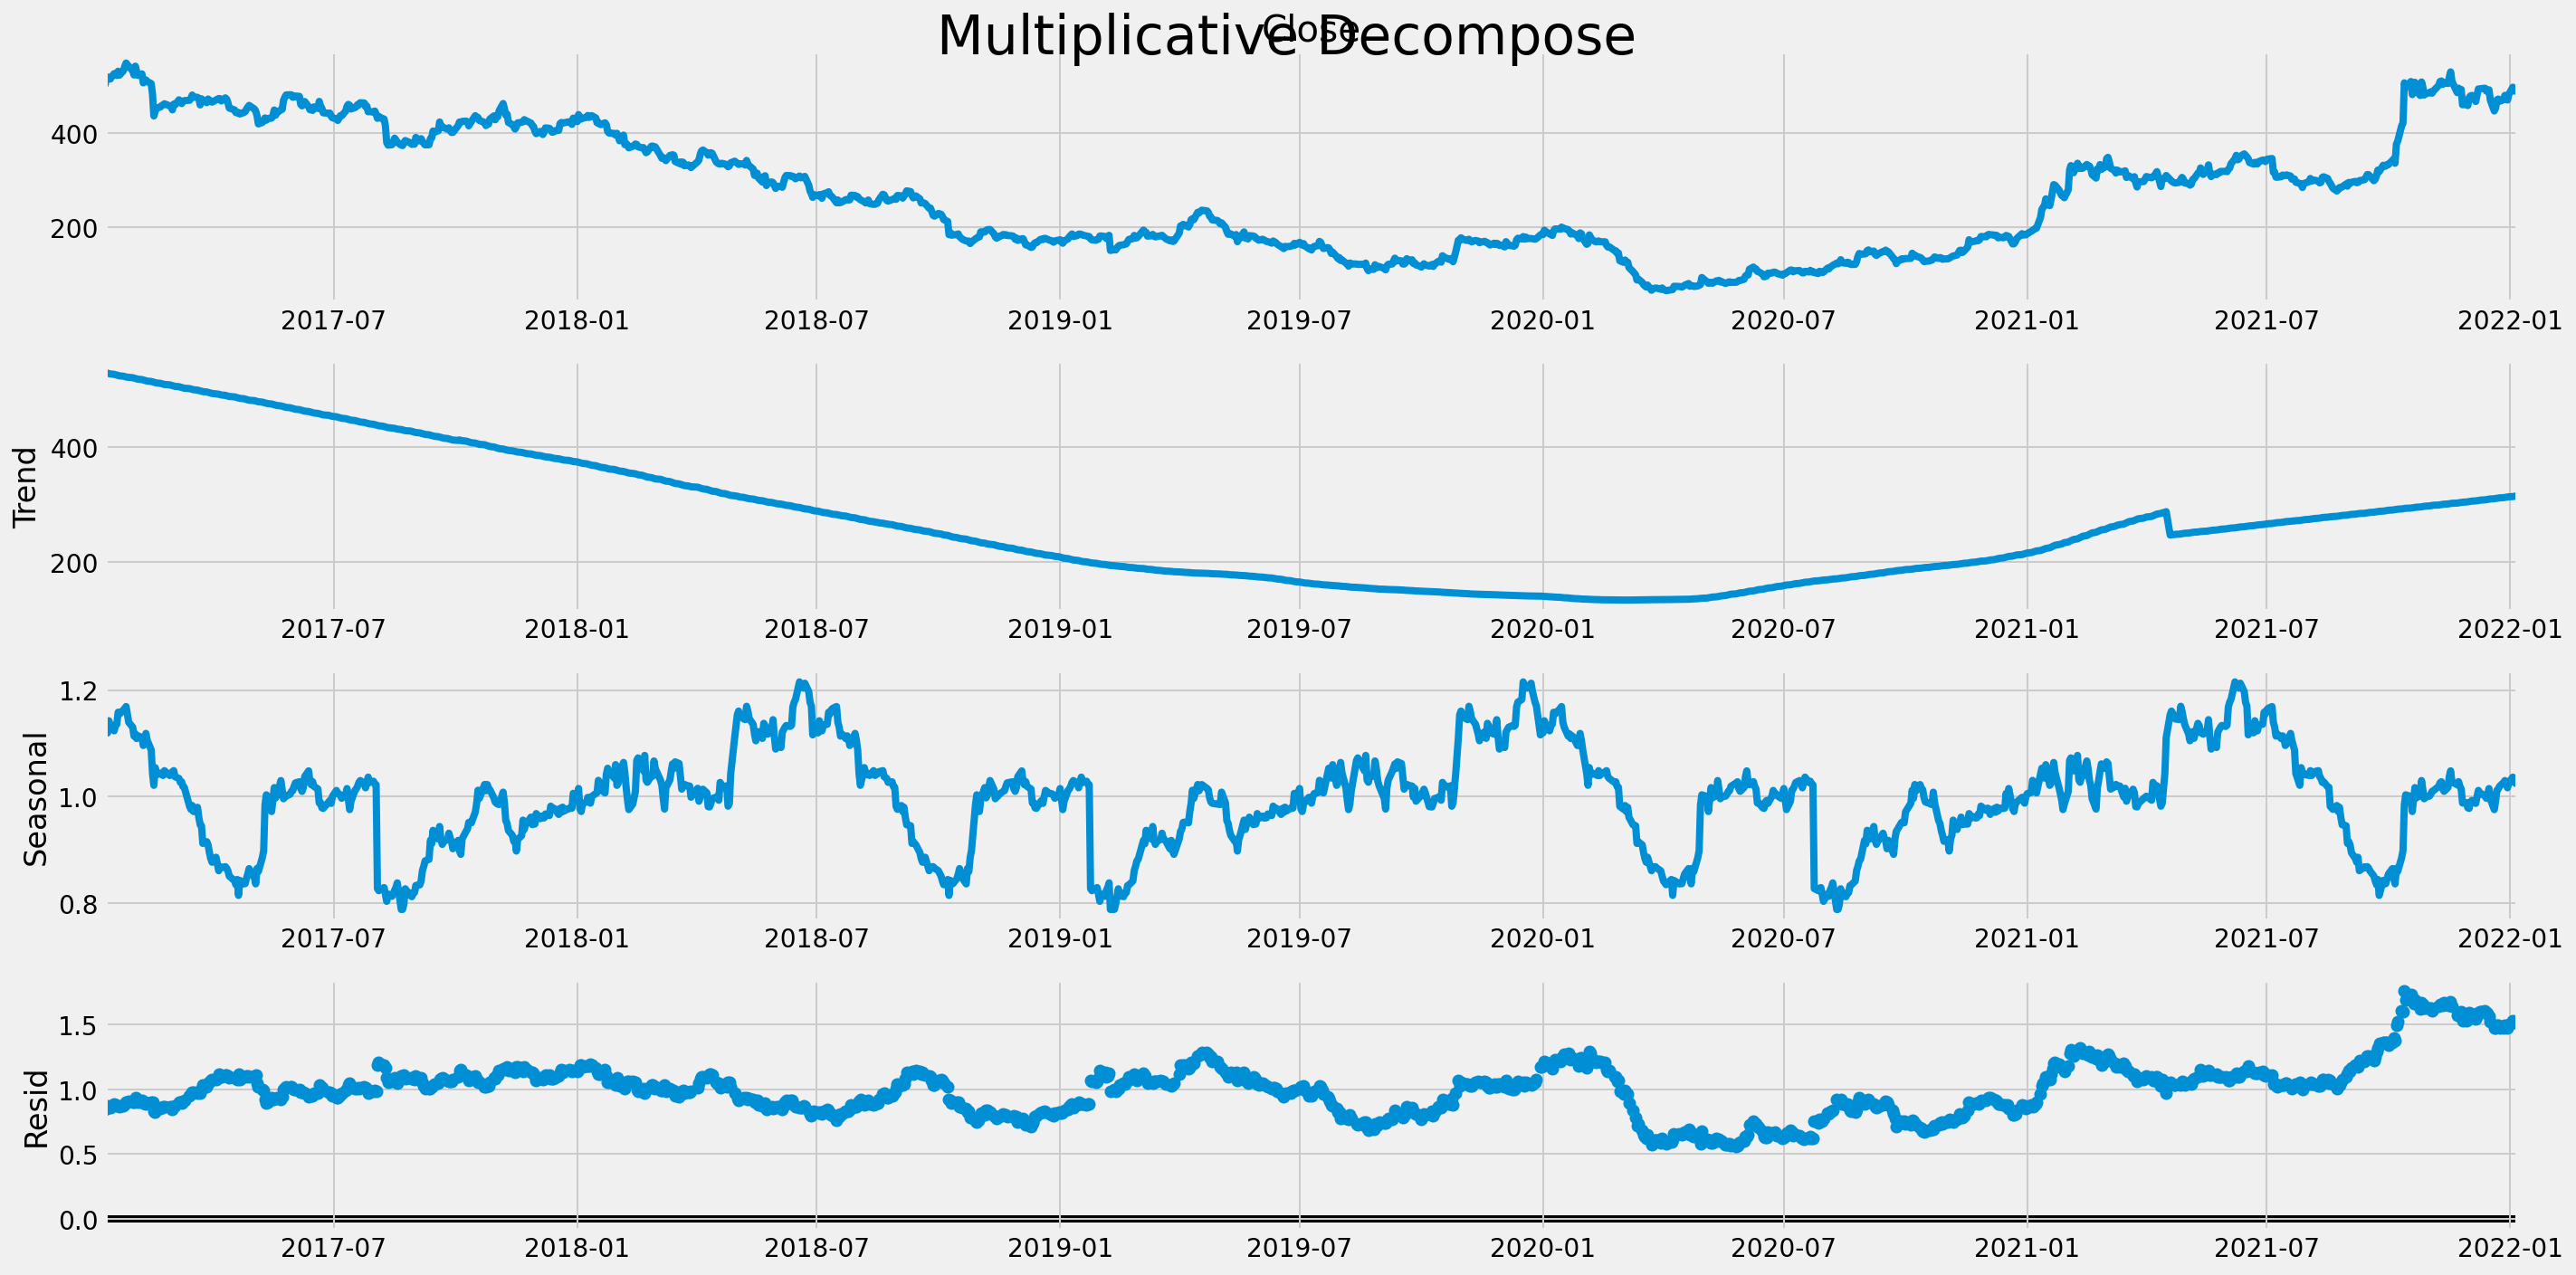

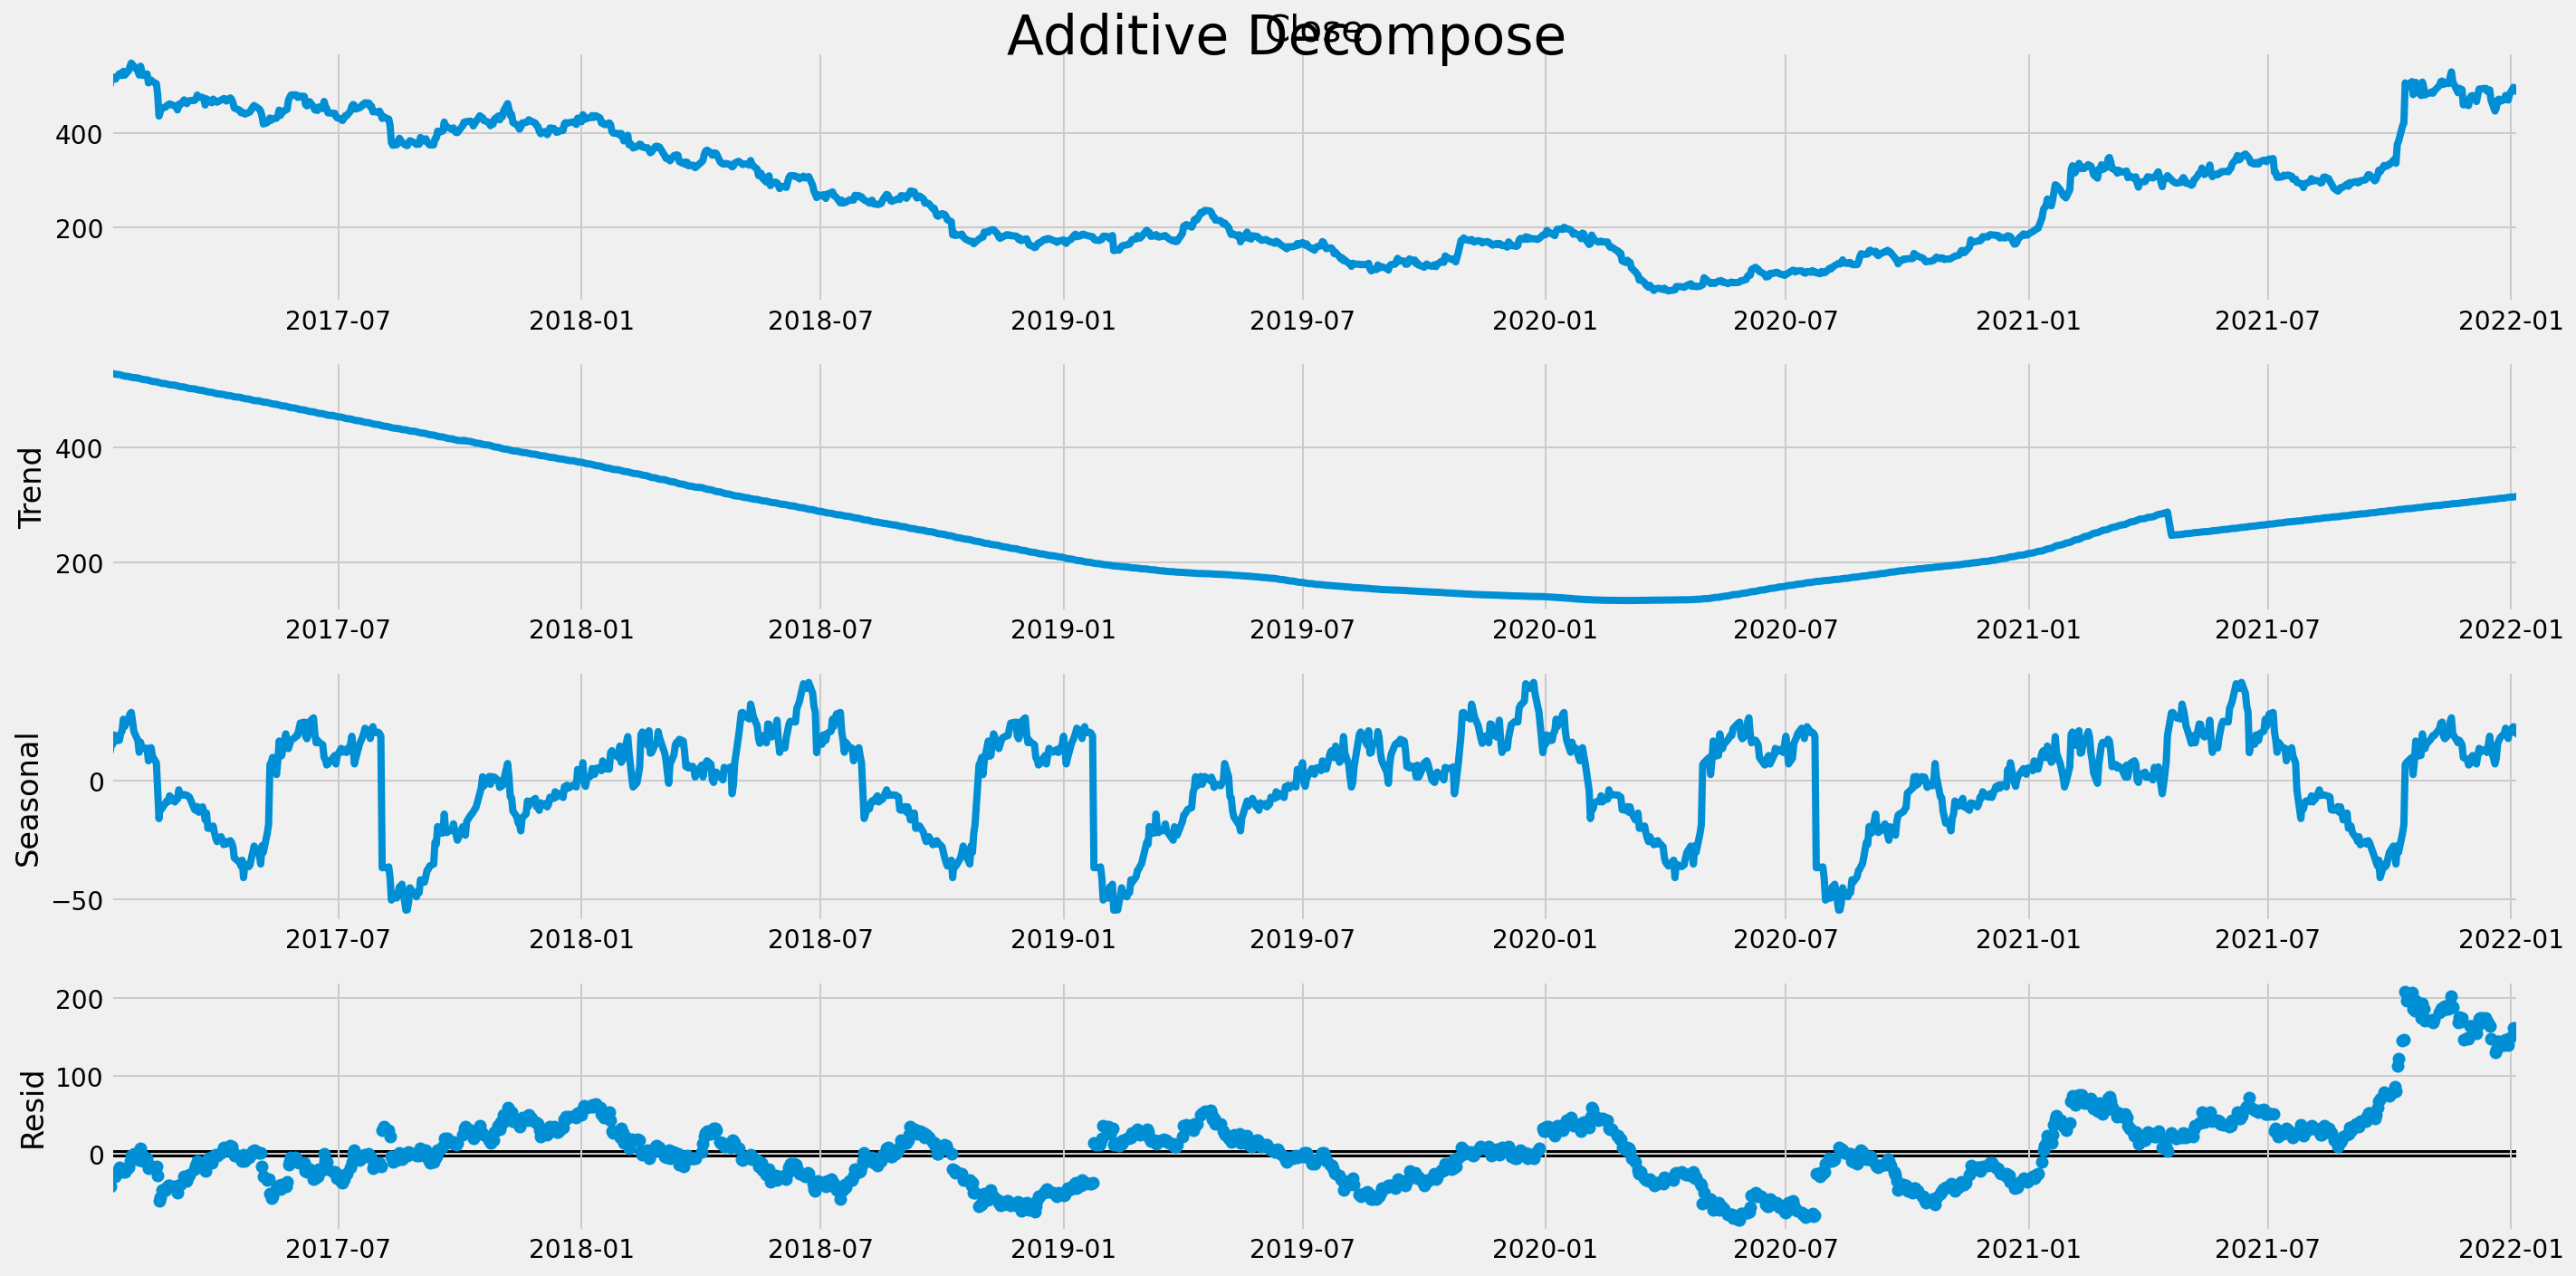

In [26]:
result_mul, result_add = decompose(df, 'Close')

In [36]:
df_Close = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_Close.columns = ['seas', 'trend', 'resid', 'actual_values']
df_Close.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-09,10.774618,525.734617,-44.359241,492.149994
2017-01-10,12.693392,525.082142,-31.825522,505.950012
2017-01-11,16.310702,524.429667,-23.590345,517.150024
2017-01-12,18.736626,523.777193,-29.313807,513.200012
2017-01-13,17.898265,523.124718,-33.522983,507.500000


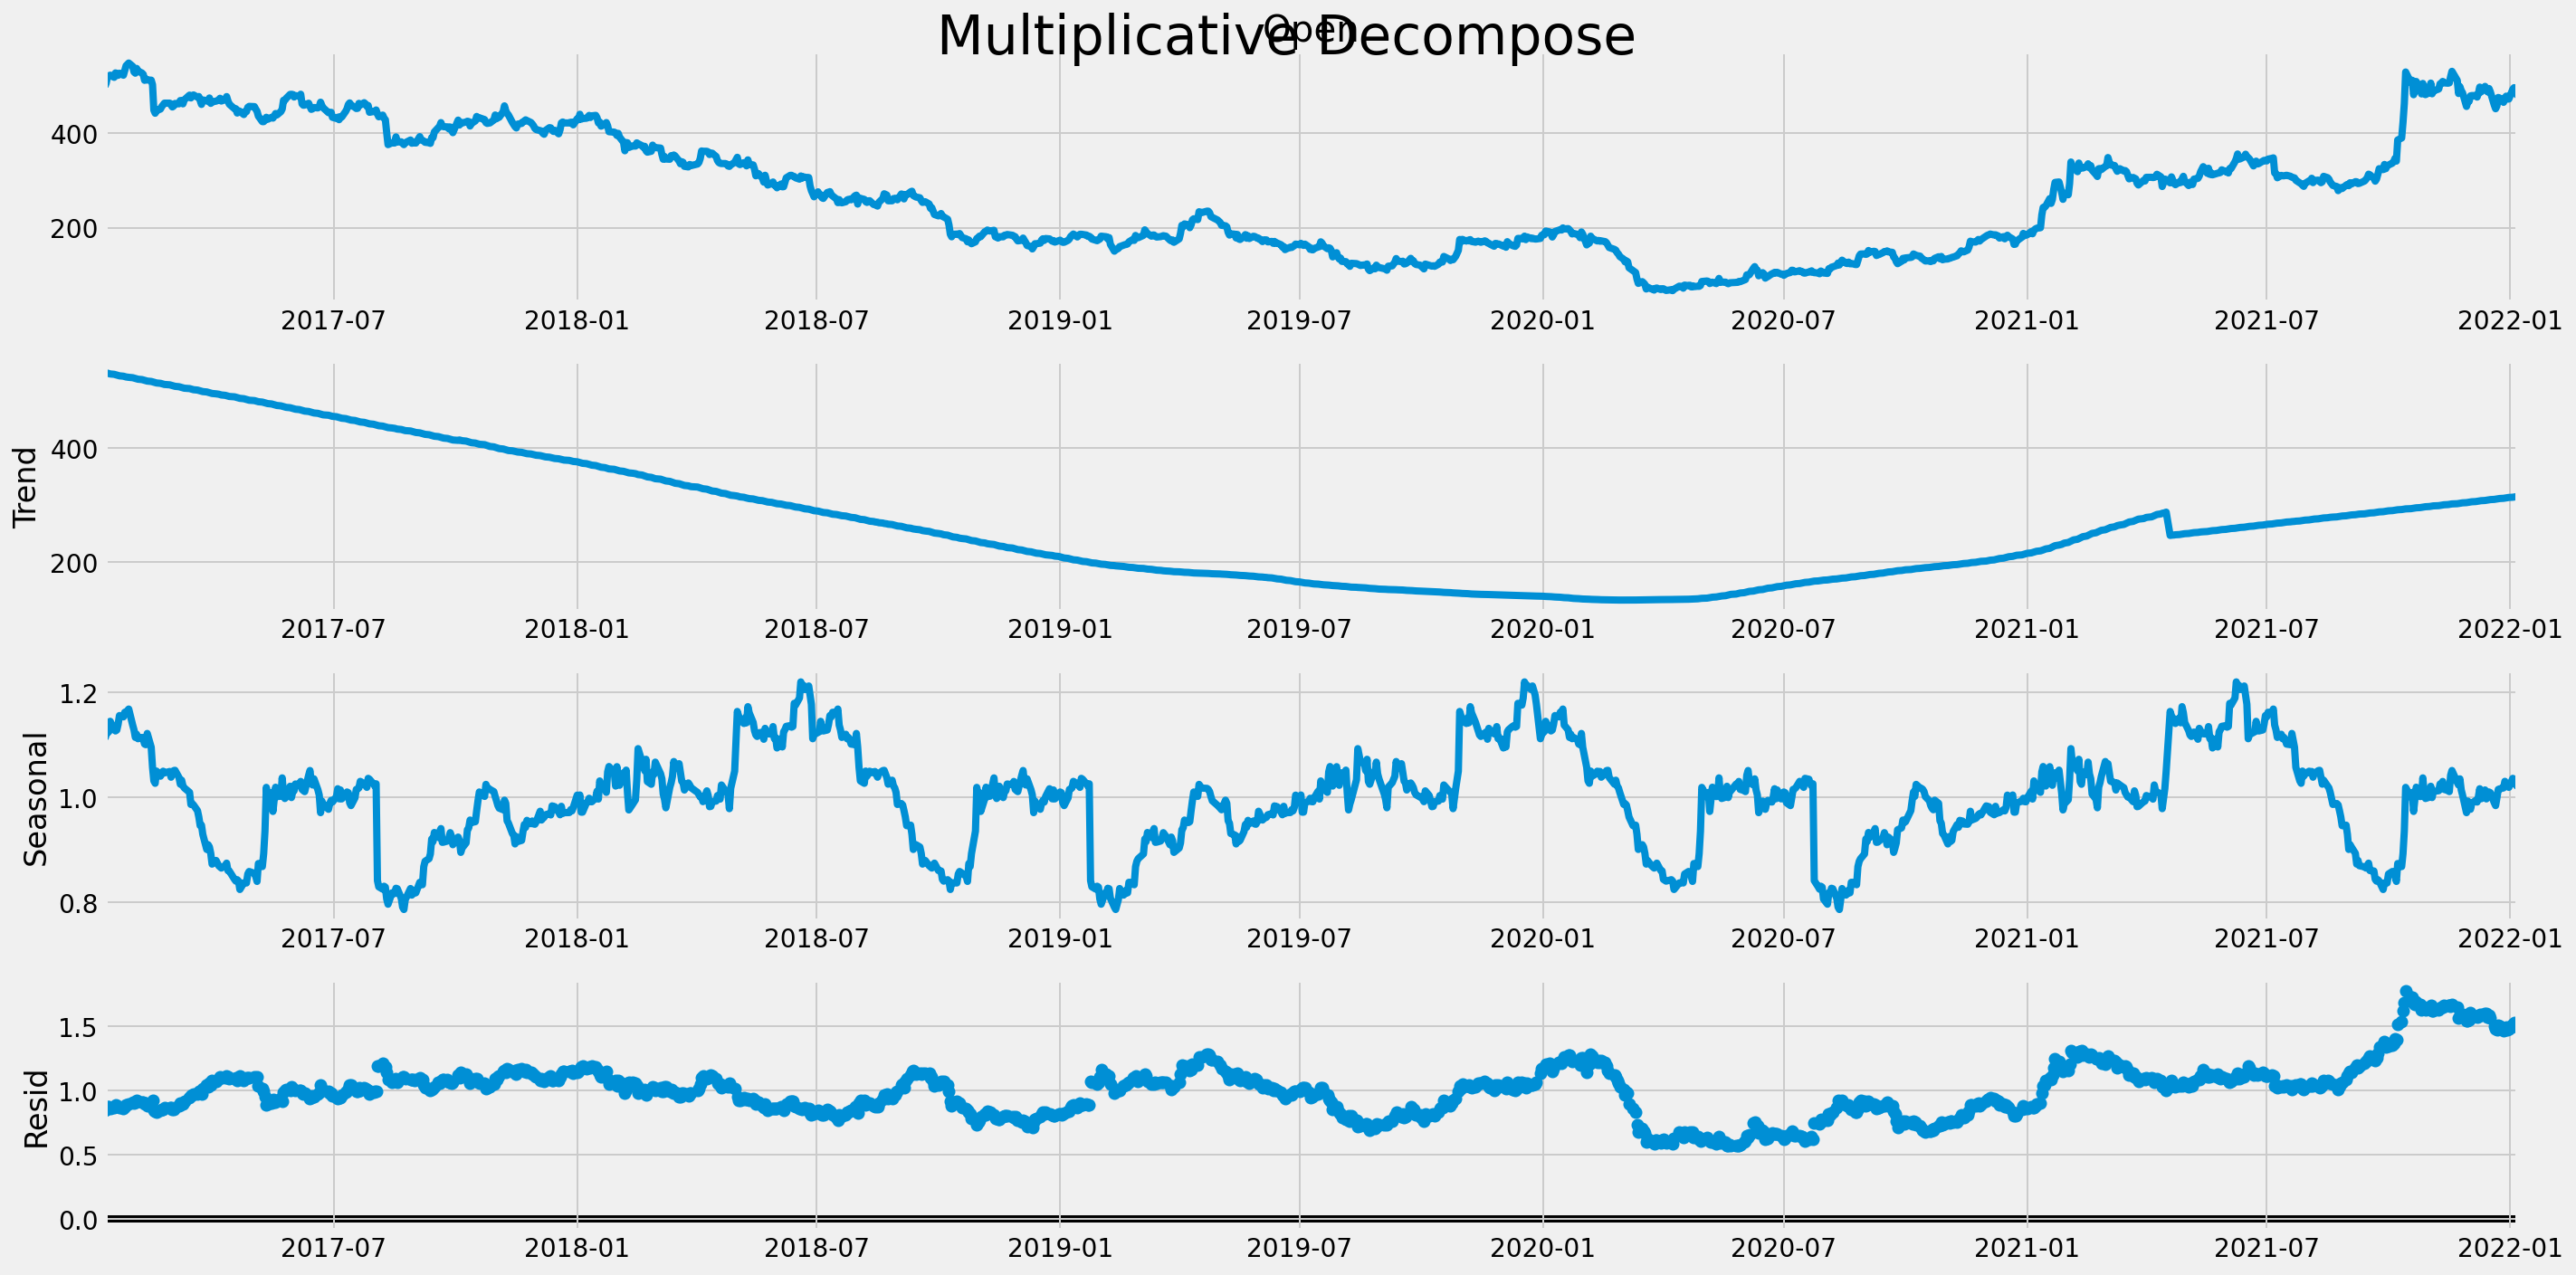

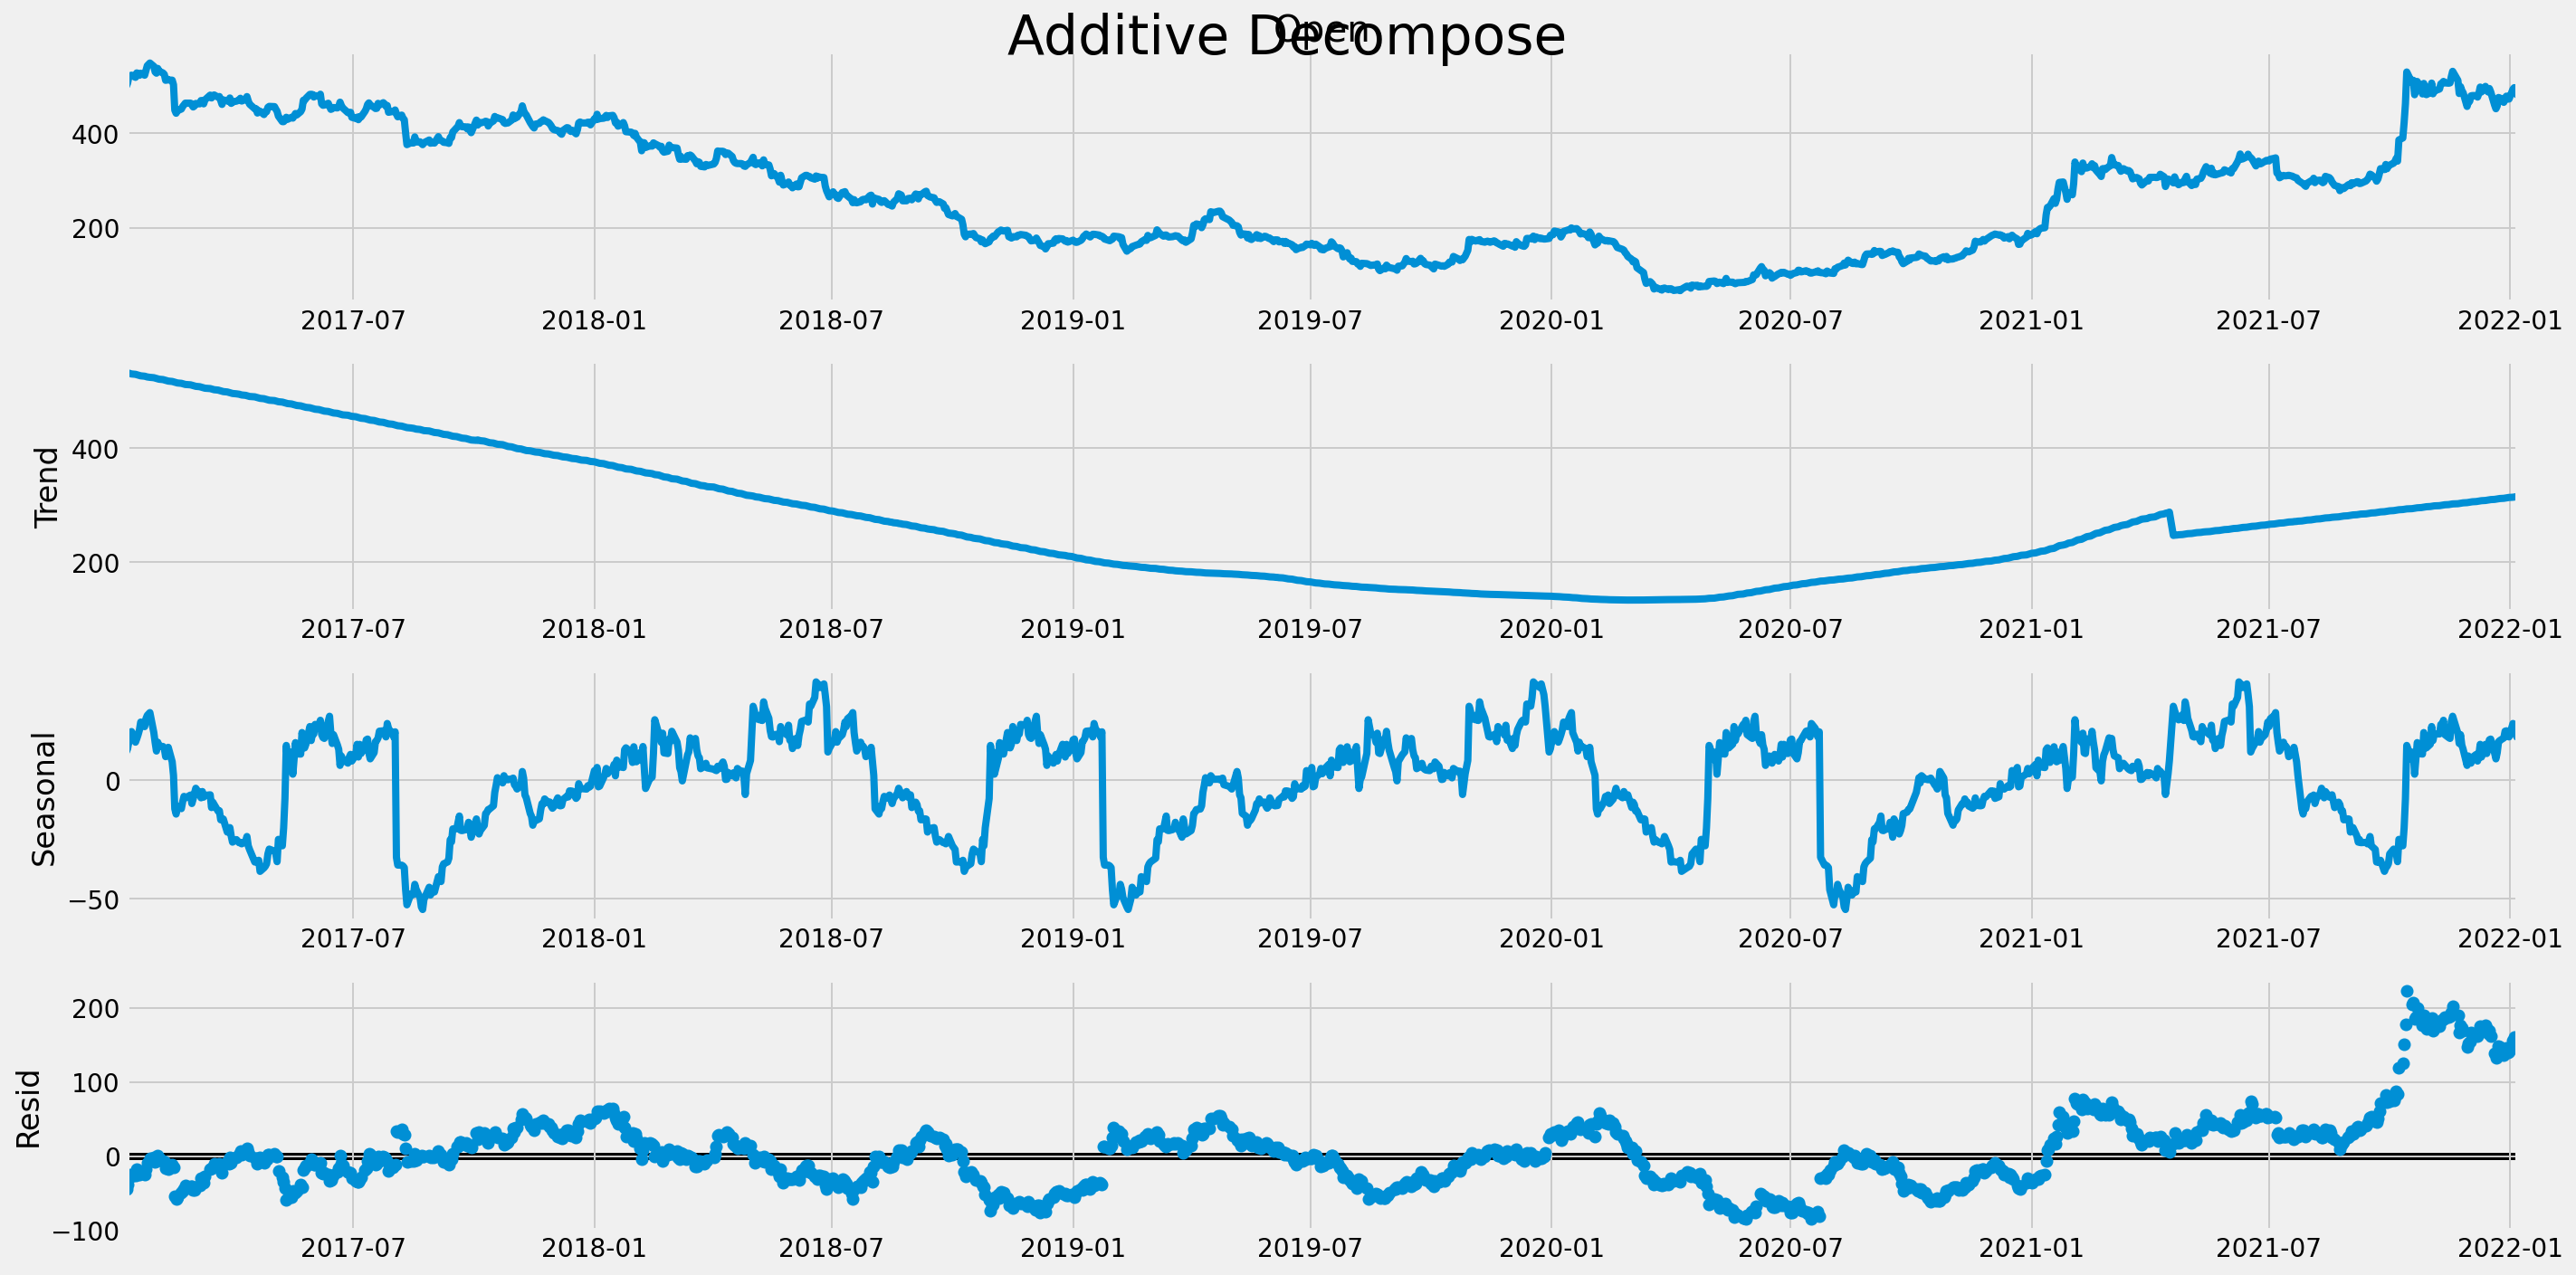

In [37]:
result_mul, result_add = decompose(df, 'Open')

In [38]:
df_Open = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_Open.columns = ['seas', 'trend', 'resid', 'actual_values']
df_Open.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-09,11.866533,532.444121,-44.910660,499.399994
2017-01-10,13.294124,531.786554,-38.530690,506.549988
2017-01-11,16.222739,531.128987,-27.101727,520.250000
2017-01-12,16.745439,530.471421,-25.516847,521.700012
2017-01-13,20.484597,529.813854,-27.048451,523.250000


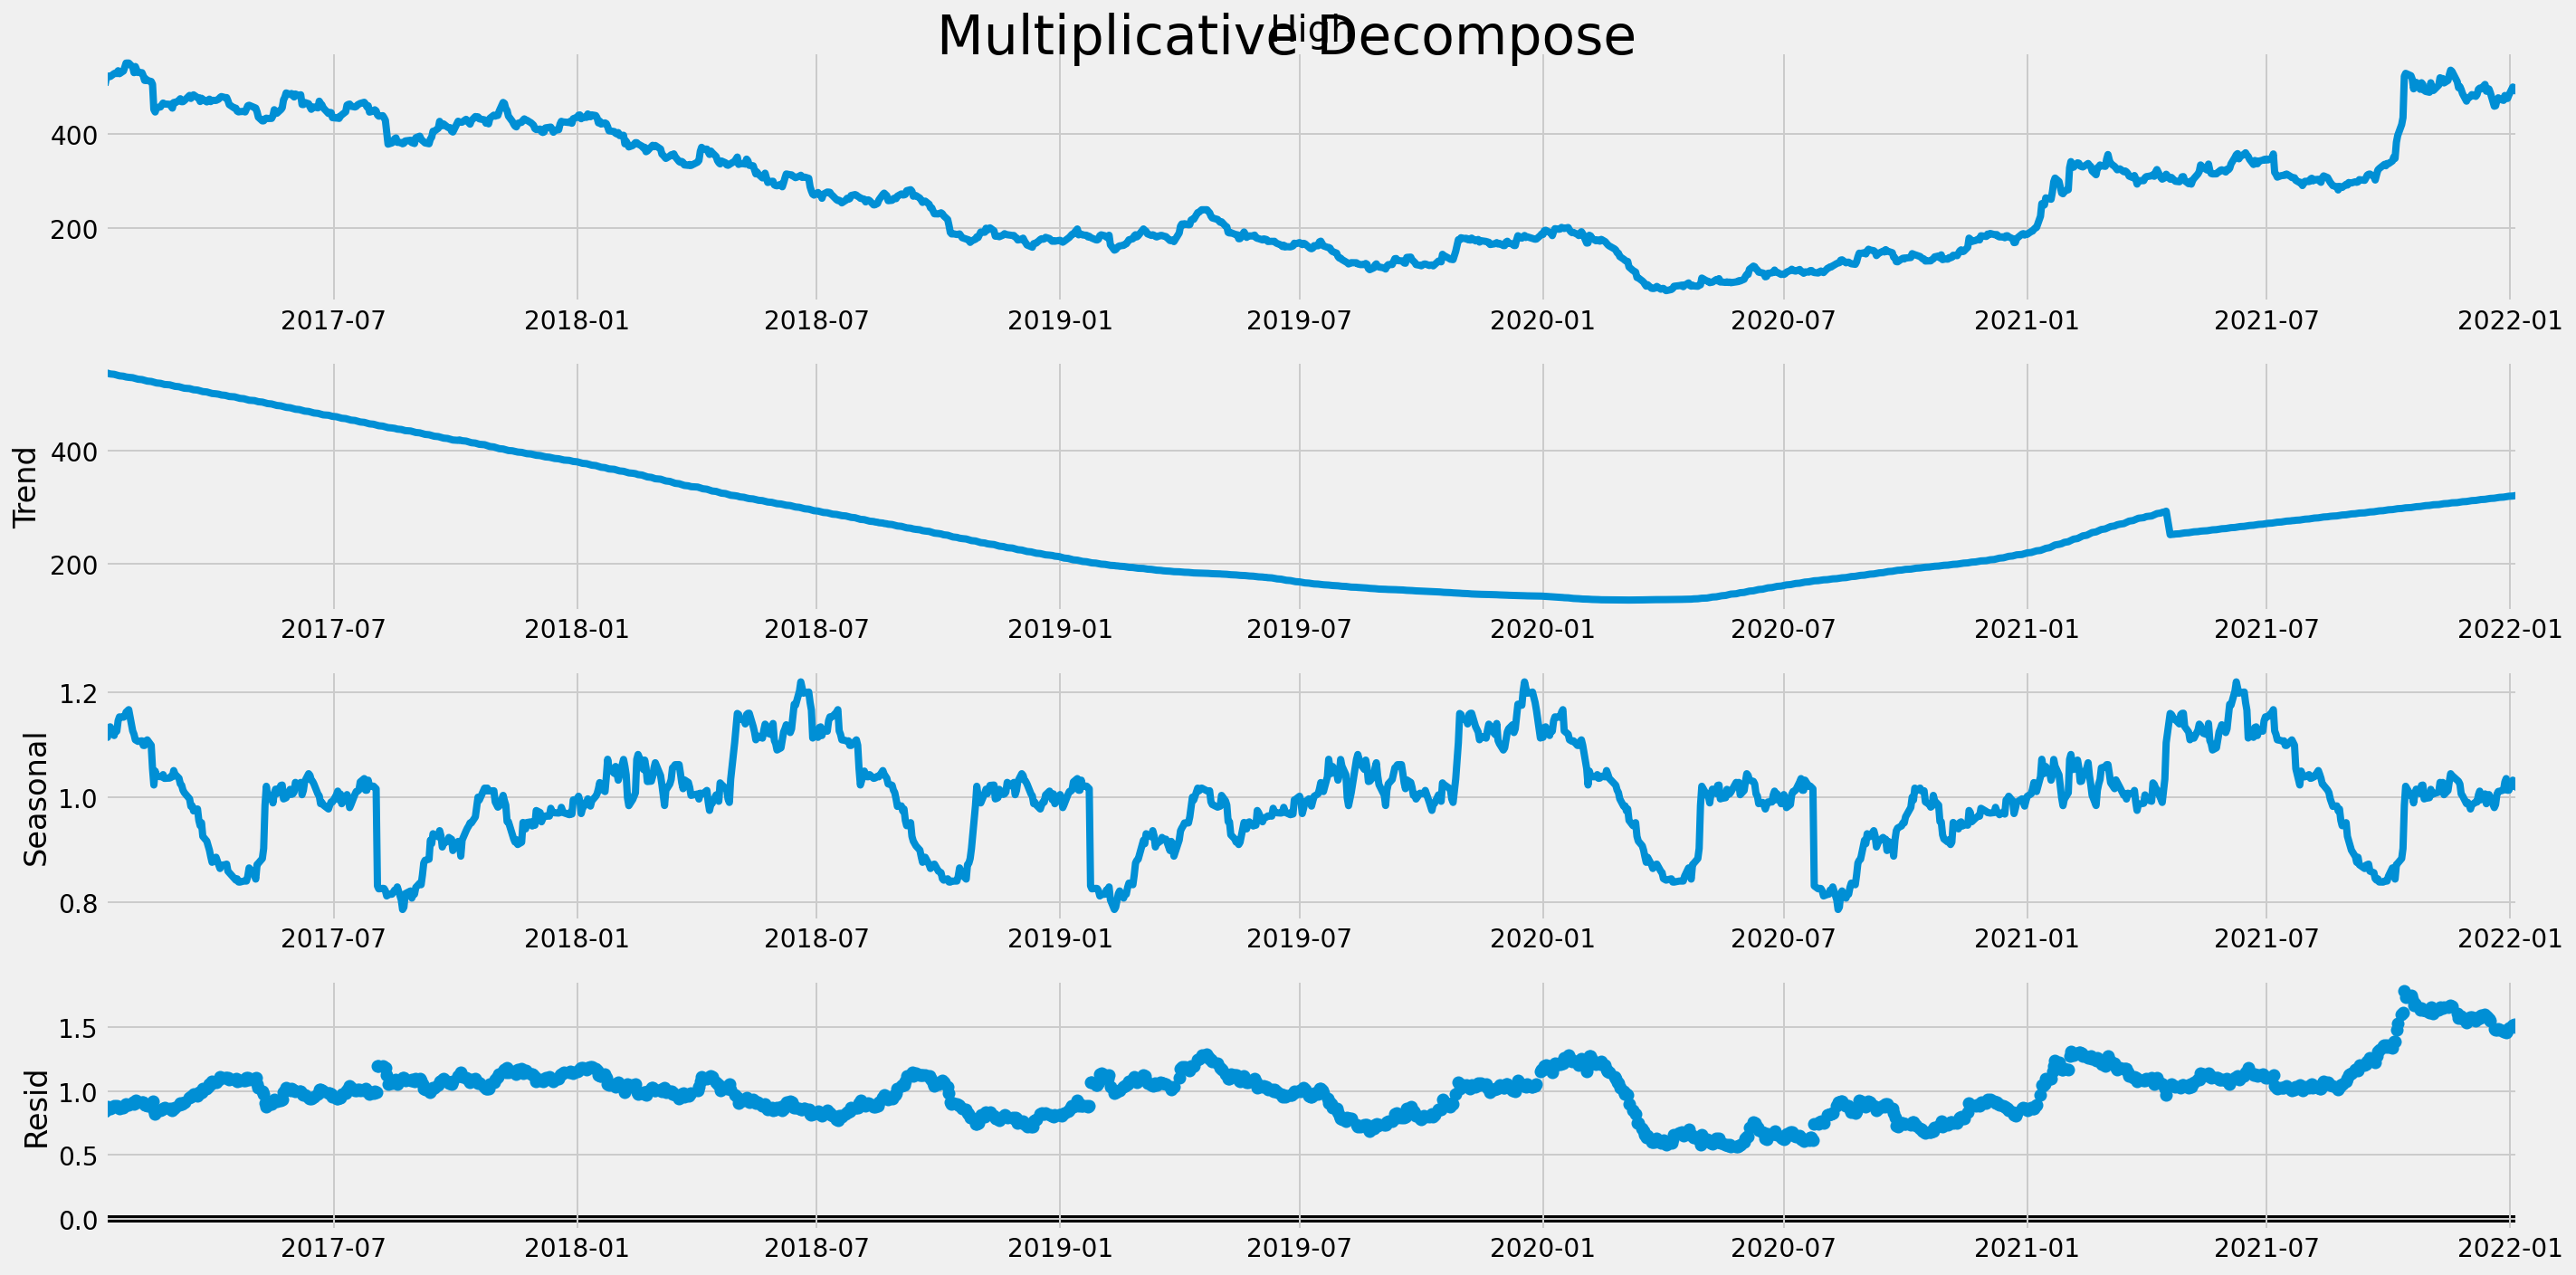

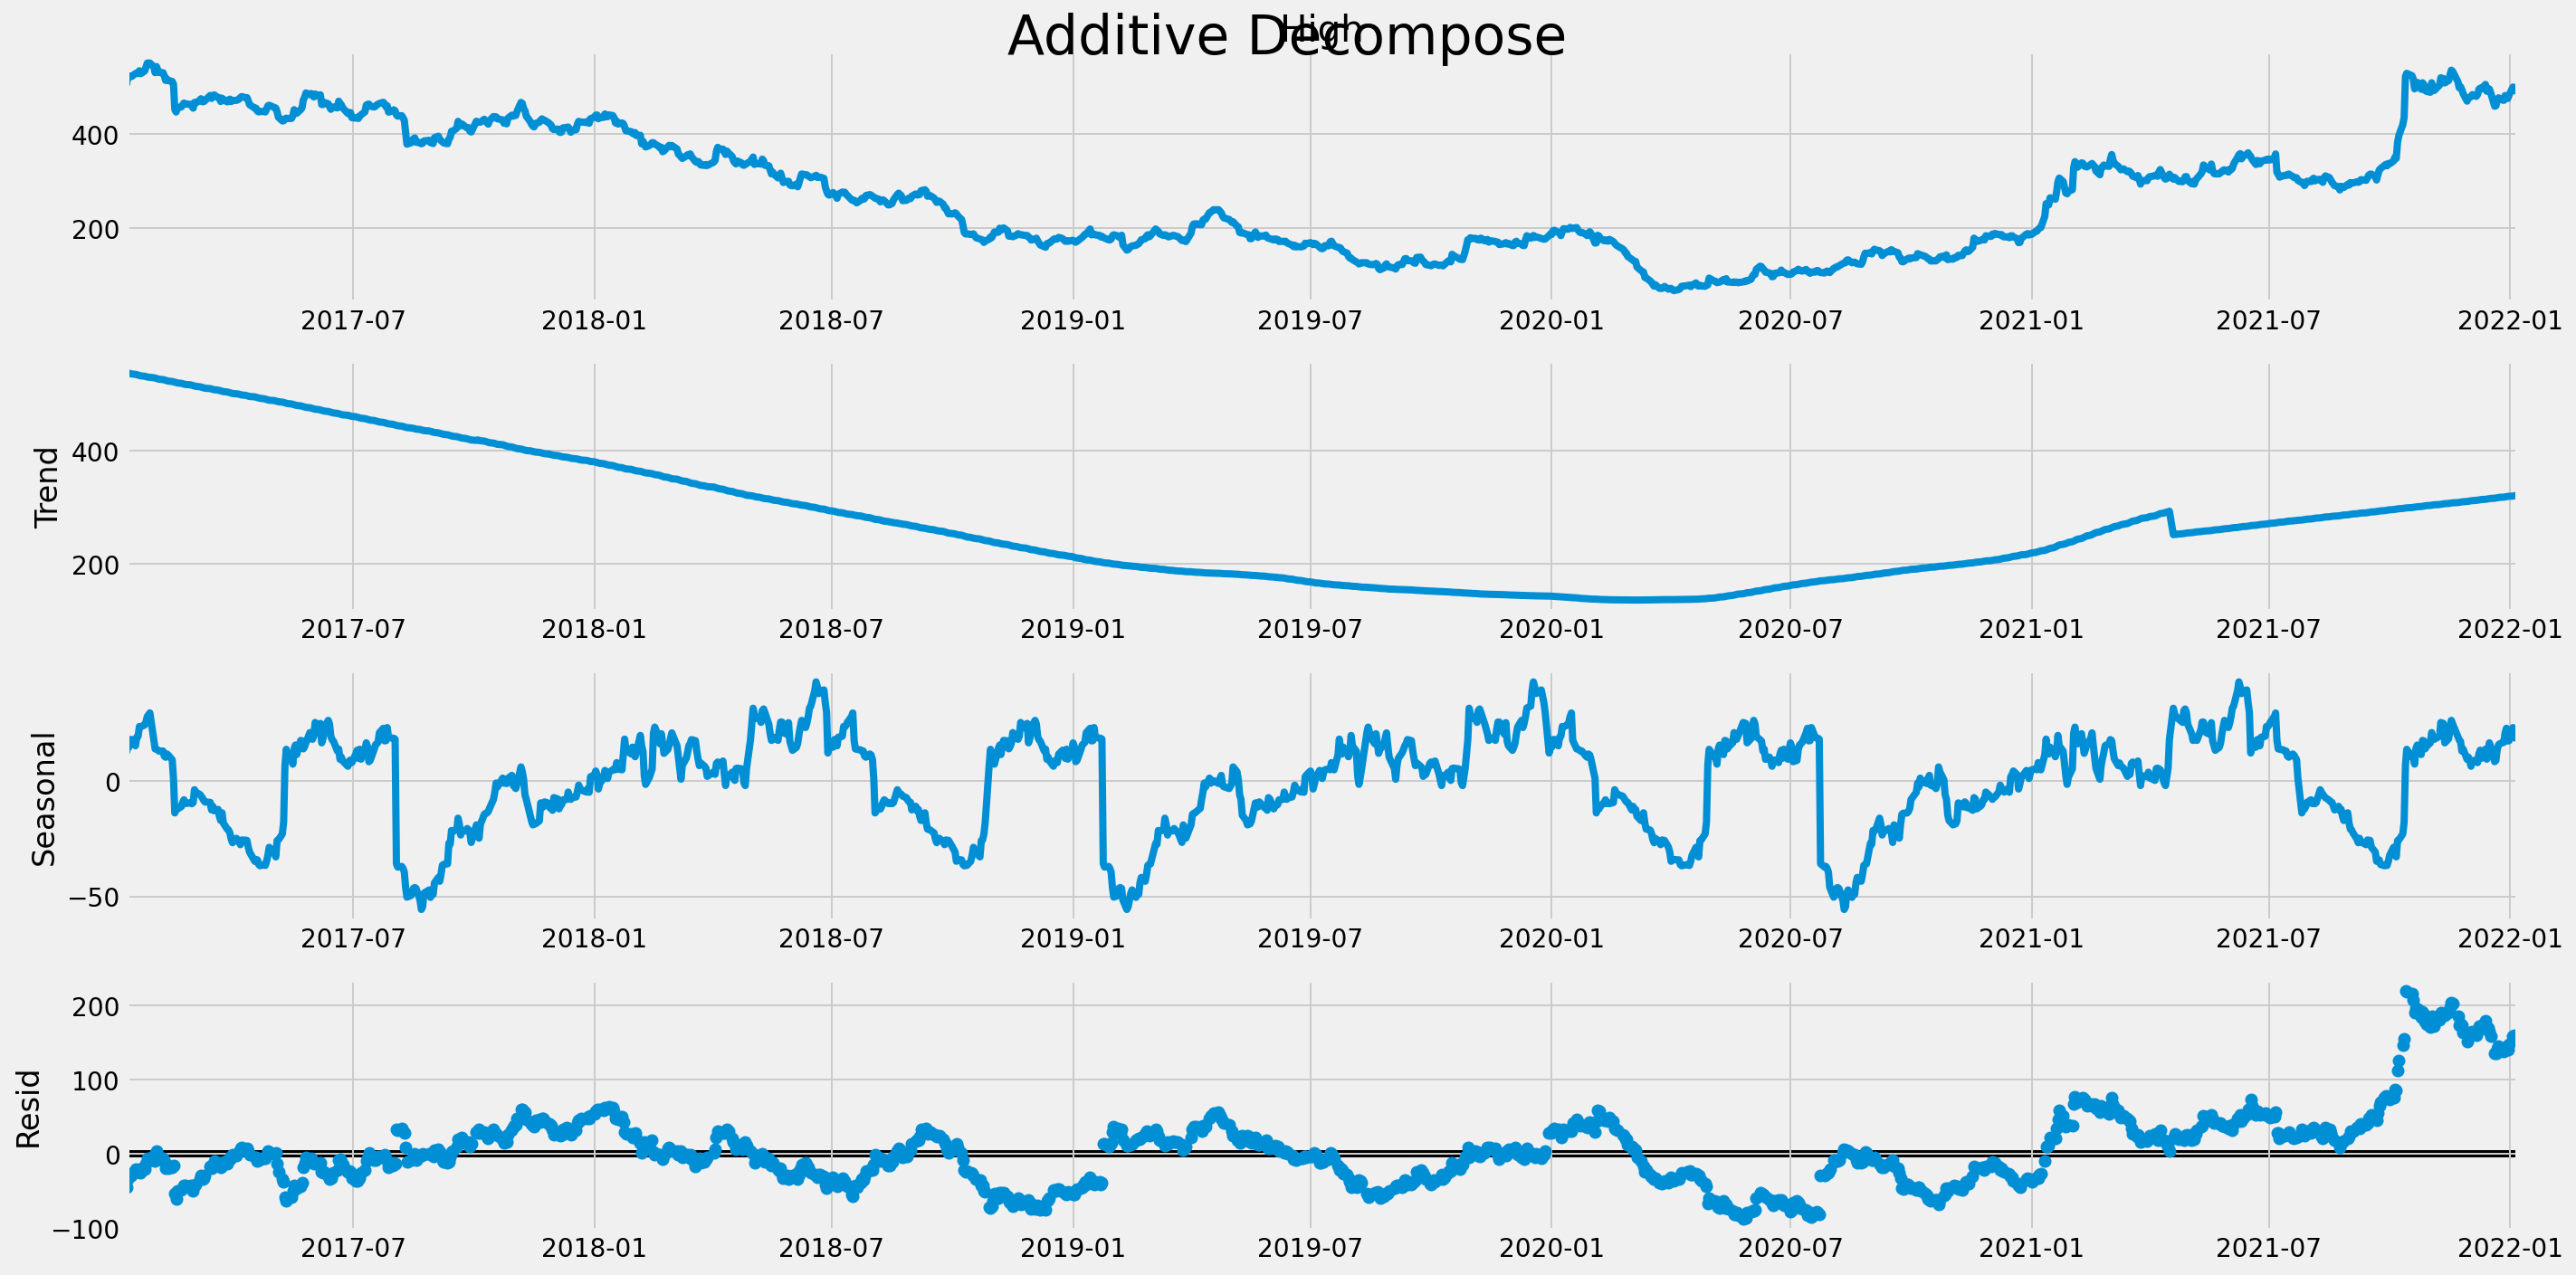

In [39]:
result_mul, result_add = decompose(df, 'High')

In [40]:
df_High = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_High.columns = ['seas', 'trend', 'resid', 'actual_values']
df_High.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-09,11.943803,537.257085,-44.600882,504.600006
2017-01-10,14.409953,536.596473,-33.006426,518.000000
2017-01-11,14.477235,535.935861,-26.463084,523.950012
2017-01-12,17.754107,535.275249,-29.029356,524.000000
2017-01-13,17.816598,534.614637,-29.181235,523.250000


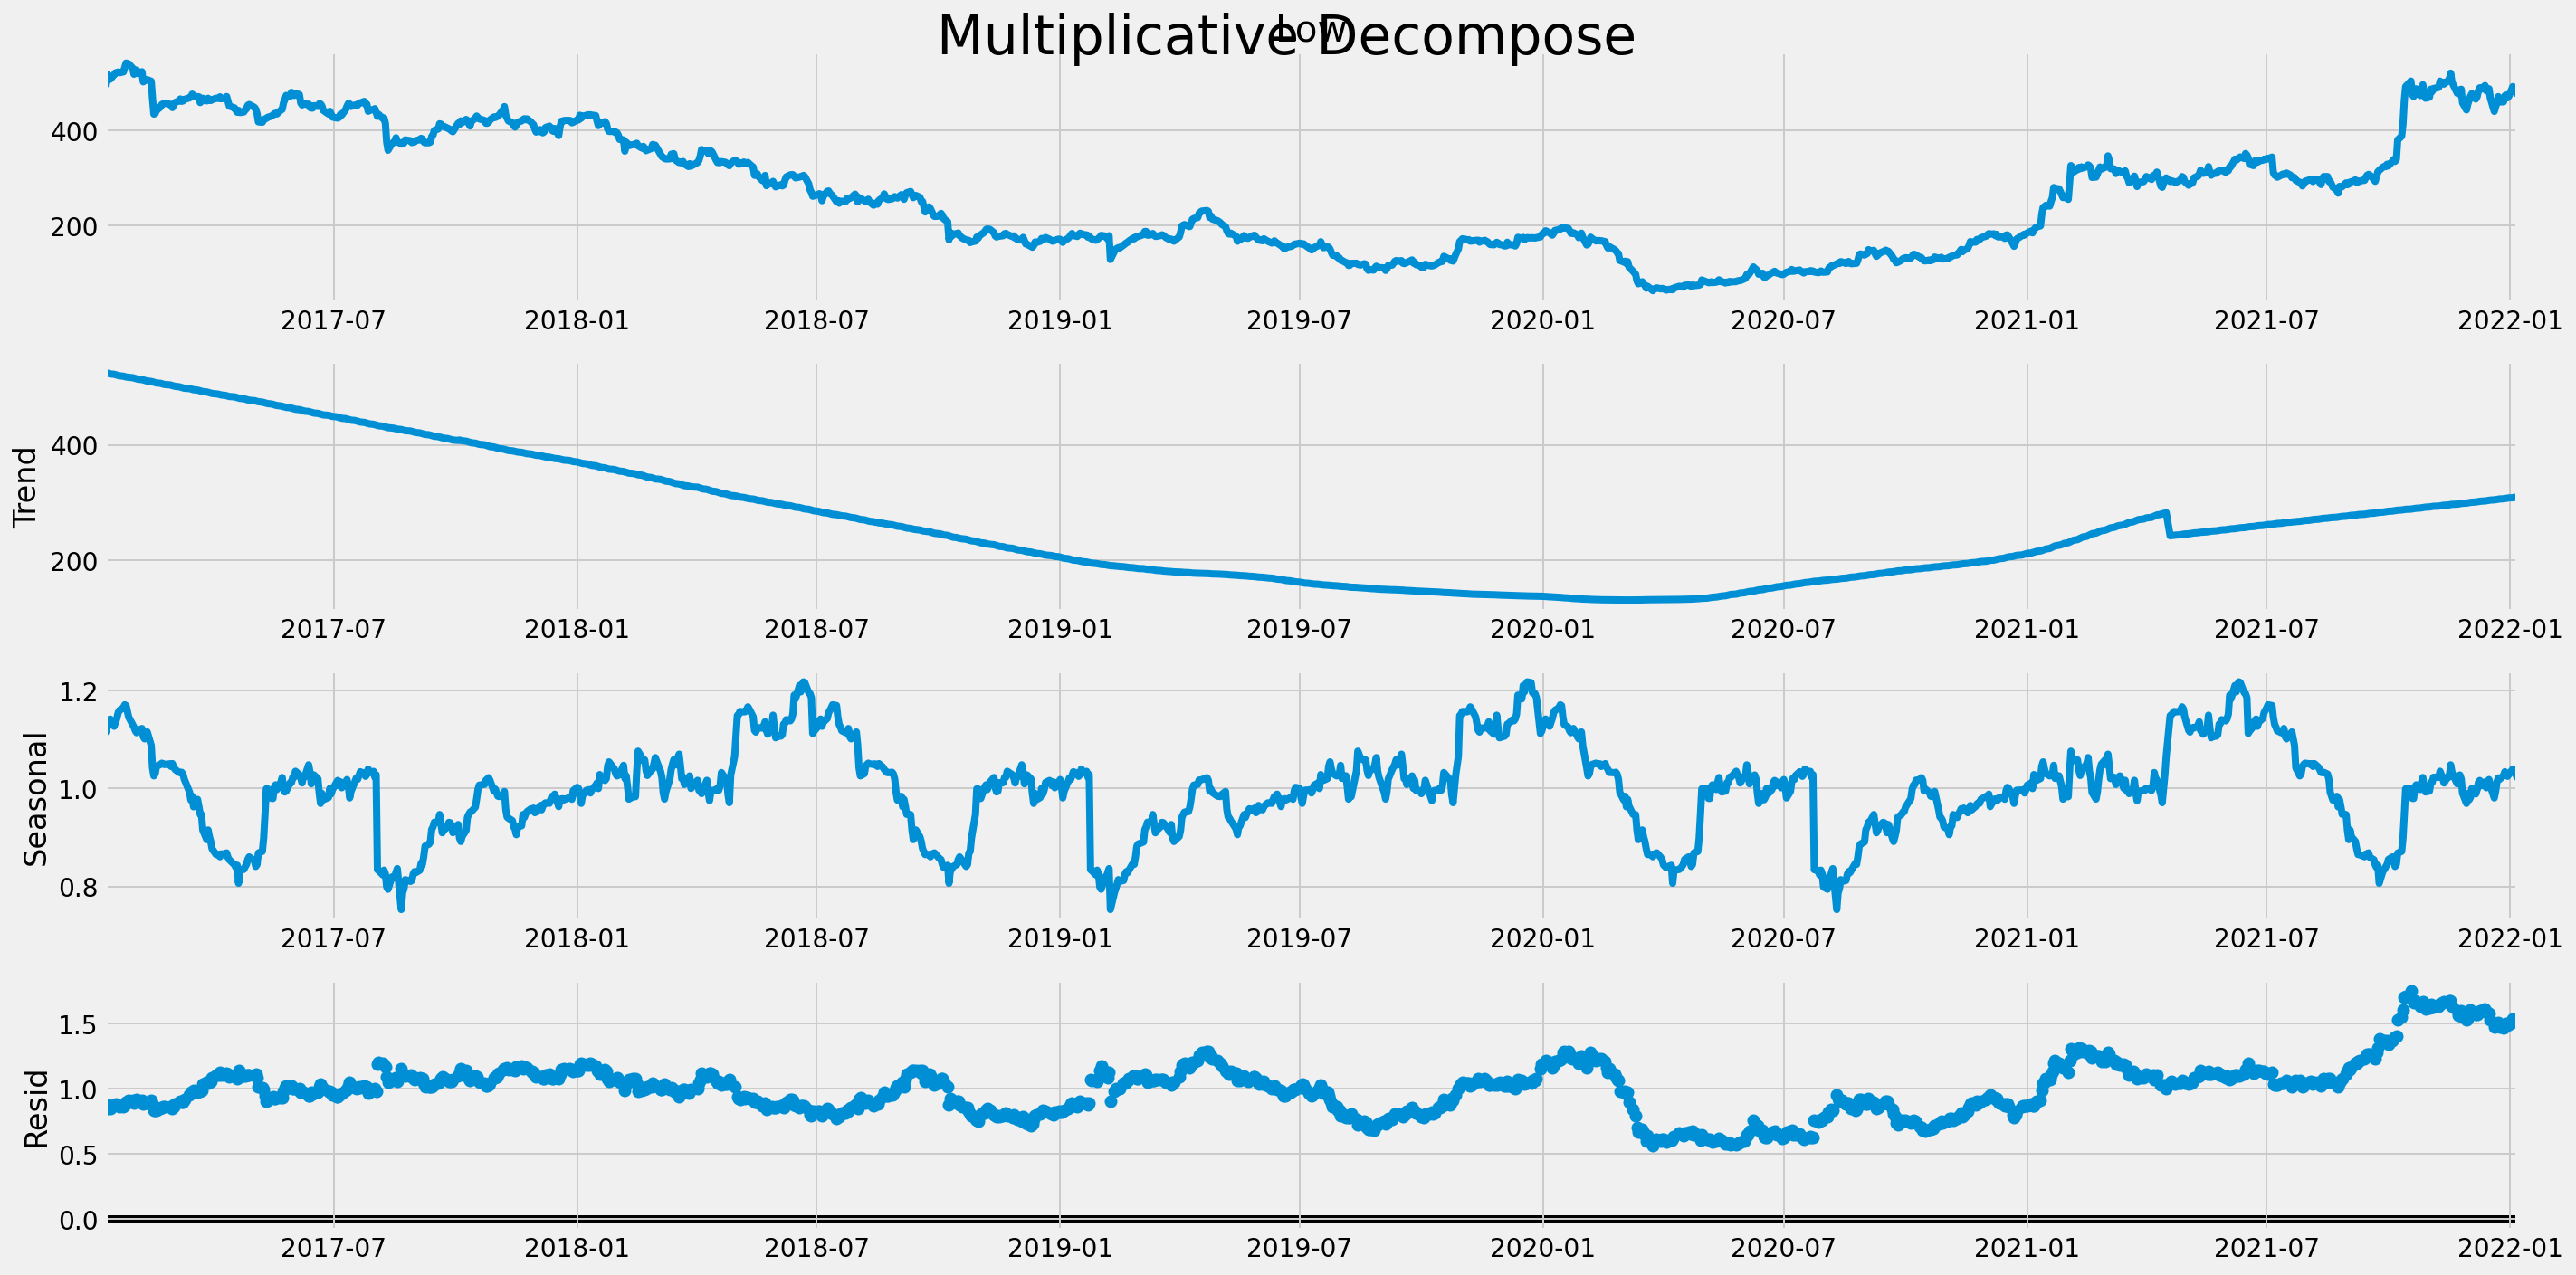

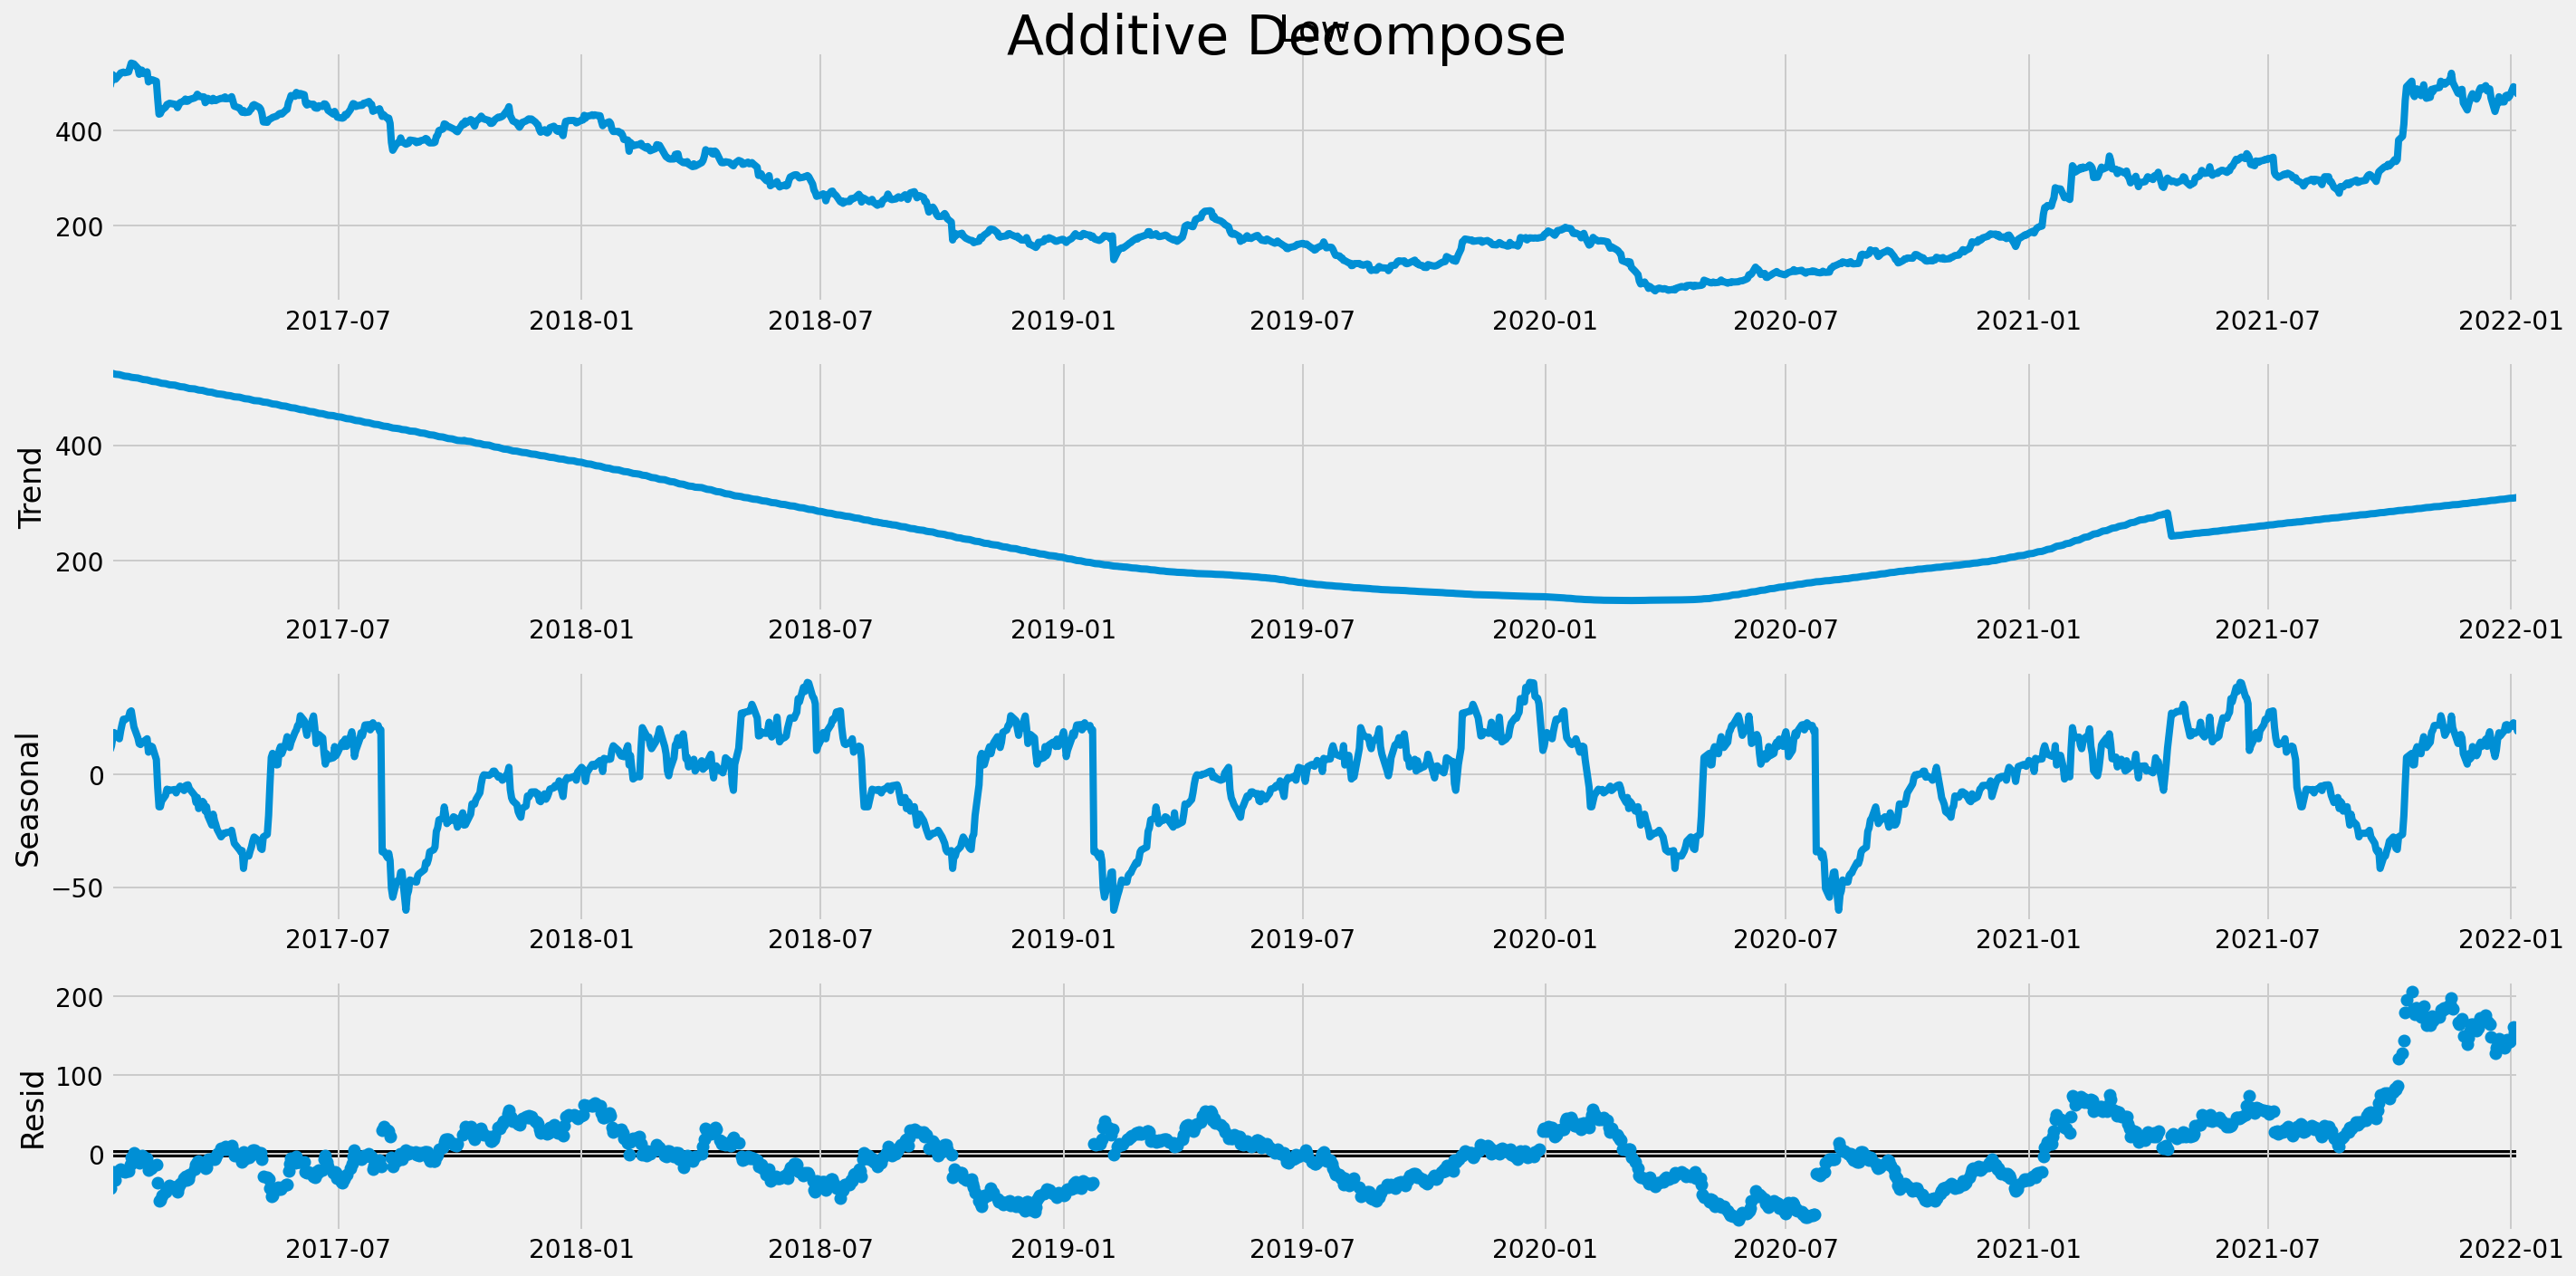

In [41]:
result_mul, result_add = decompose(df, 'Low')

In [42]:
df_Low = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_Low.columns = ['seas', 'trend', 'resid', 'actual_values']
df_Low.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-09,10.774618,525.734617,-44.359241,492.149994
2017-01-10,12.693392,525.082142,-31.825522,505.950012
2017-01-11,16.310702,524.429667,-23.590345,517.150024
2017-01-12,18.736626,523.777193,-29.313807,513.200012
2017-01-13,17.898265,523.124718,-33.522983,507.500000


In this way, we are able to capture the trend, seasonality and residuals. By looking at these parameters, we can use trend or seasonality as features or use it to study the time-series dataset.